In [54]:
#importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [55]:
# Loading excel data into dataframe

df=pd.read_csv('telecom_churn_data.csv')
df.shape

(99999, 226)

In [56]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [57]:
# Column names in raw data
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], dtype='object', length=226)

In [58]:
#removing all columns related to 9th month as it is time is not required in modelling 
# Also dropping last day of the month column
#Dropping Circle id (Same data/Skewed)

df1=df.drop(['last_date_of_month_9','arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9','std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_t2c_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9','loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9','std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9','std_ic_t2o_mou_9','std_ic_mou_9','spl_ic_mou_9','isd_ic_mou_9','ic_others_9','total_rech_num_9','total_rech_amt_9','max_rech_amt_9','date_of_last_rech_9','last_day_rch_amt_9','date_of_last_rech_data_9','total_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','arpu_3g_9','arpu_2g_9','night_pck_user_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','fb_user_9','sep_vbc_3g','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1)

In [59]:
# Excluding the columns which has more than 40% Null values 

df2=df1.loc[:,df.isna().mean() < 0.4]

In [60]:
(df2.isna().mean() > 0).sum()

90

In [61]:
df2["date_of_last_rech_6"].fillna("0",inplace=True)
df2["date_of_last_rech_7"].fillna("0",inplace=True)
df2["date_of_last_rech_8"].fillna("0",inplace=True)

In [62]:
# IDentifying date columns
date_cols=[j for i,j in enumerate(df2.columns.values) if 'date' in j]
date_cols

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [63]:
# Converting date columns to continious values 
for i in date_cols:
    df2[i]=df2[i].apply(lambda x: 0 if x==0 else int(str(x).split('/')[0]))

## Median Imputation to rest of the continious features

In [64]:
df3 = df2.apply(lambda x: x.fillna(x.median()),axis=0)

In [65]:
print ("Resultant dataframe shape :" ,df3.shape)

Resultant dataframe shape : (99999, 138)


In [66]:
#creating the new column with the total recharge amt for 6 and 7 months
df3['avg_6_7_rech_amt'] = (df3['total_rech_amt_6'] + df3['total_rech_amt_7'])/2
df3.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_6_7_rech_amt
0,7000842753,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.0,0.00,0.00,0.0,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.00,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,0.0,0.0,0.0,11.64,11.09,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,4,3,2,362,252,252,252,252,252,6,7,8,252,252,252,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,1,1,1,0,0,0,968,30.4,0.0,101.20,307.0
1,7001865778,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.840,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.510,299.54,0.23,4.11,0.00,0.00,0.460,0.13,0.00,0.00,0.00,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,188.04,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4,9,11,74,384,283,44,154,65,6,7,8,44,23,30,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,2,0,0,0,0,0,0,1006,0.0,0.0,0.00,229.0
2,7001625959,167.690,189.058,210.226,11.54,55.24,37.26,143.33,220.590,208.36,0.0,0.00,0.00,0.0,0.00,0.00,7.19,28.74,13.58,29.34,16.86,38.46,24.11,21.79,15.61,0.0,135.54,45.76,60.66,67.410,67.66,4.34,26.49,22.58,41.81,67.410,75.53,1.48,14.76,22.83,0.0,0.0,0.0,47.64,108.68,120.94,0.0,0.0,0.0,46.56,236.84,96.84,0.45,0.0,0.0,155.33,412.94,285.46,124.94,115.69,71.11,67.46,14.38,15.44,38.89,99.48,122.29,49.63,229.56,208.86,155.99,72.41,71.29,28.69,45.18,177.01,167.09,21.73,58.34,43.23,0.0,0.0,0.0,139.33,306.66,239.03,370.04,519.53,395.03,517.74,0.21,0.0,0.0,0.00,0.85,0.0,0.93,3.14,0.0,5,4,2,168,315,116,86,200,86,6,7,8,0,200,86,0.00,0.00,

In [67]:
#Finding 70th percentile of the avg column
HVC = np.percentile(np.array(df3['avg_6_7_rech_amt'].values), 70)
HVC

368.5

In [68]:
#filtering all customers who are high valued customers
df4 = df3[df3['avg_6_7_rech_amt']>HVC]
df4.shape

(29979, 139)

# The problem statement is to find the churn on basis of 4 features in month 9 , those are total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9. So deriving a column churn by adding these values .

In [69]:
def churn(x):
    if (x['total_ic_mou_9']+x['total_og_mou_9']+x['vol_2g_mb_9']+x['vol_3g_mb_9']) ==0:
        return 1
    else:
        return 0
    
df4['churn'] = df4.apply(churn, axis=1)

In [70]:
#checking the churn count for all the records
df4['churn'].groupby(df4['churn']).count()

churn
0    27390
1     2589
Name: churn, dtype: int64

In [71]:
#Checking Churn rate

churn_value=100*(sum(df4['churn'])/len(df4['churn'].index))
print("Churn Rate : " , round(churn_value,2))

Churn Rate :  8.64


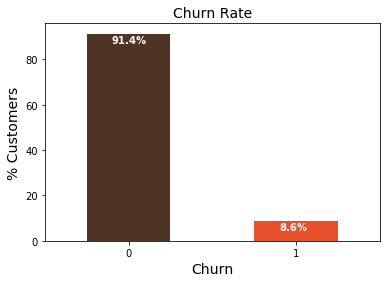

In [72]:
colors = ['#4D3425','#E4512B']
ax = (df4['churn'].value_counts()*100.0 /len(df4)).plot(kind='bar',stacked = True,rot = 0,color = colors,figsize = (6,4))
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 10)


In [73]:
#finding the flag columns
flg_col =[]
for i in df4.columns:
    if len(df4[i].unique())<=2:
        flg_col.append(i)

flg_col

['std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'churn']

In [74]:
#dropping these columns except the churn column
df4.drop(flg_col[:-1], axis=1, inplace=True)
df4.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_6_7_rech_amt,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.00,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,631.86,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,

In [75]:
df4.shape

(29979, 131)

In [76]:
#Dropping the 9th Month Columns
df4.drop(['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','avg_6_7_rech_amt','og_others_8','og_others_7'],axis = 1, inplace = True)

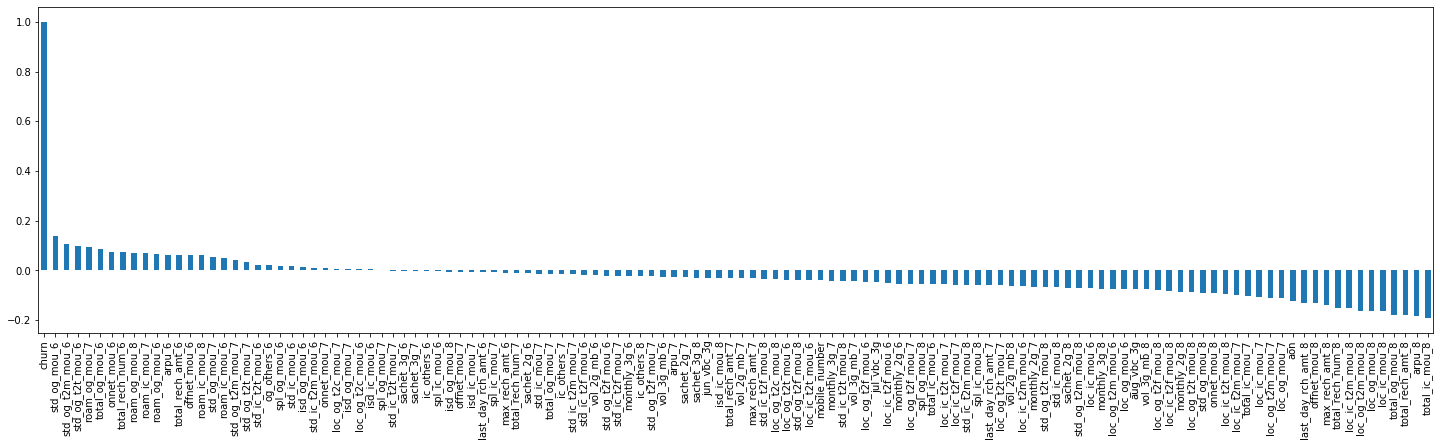

In [77]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(25,6))
df4.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

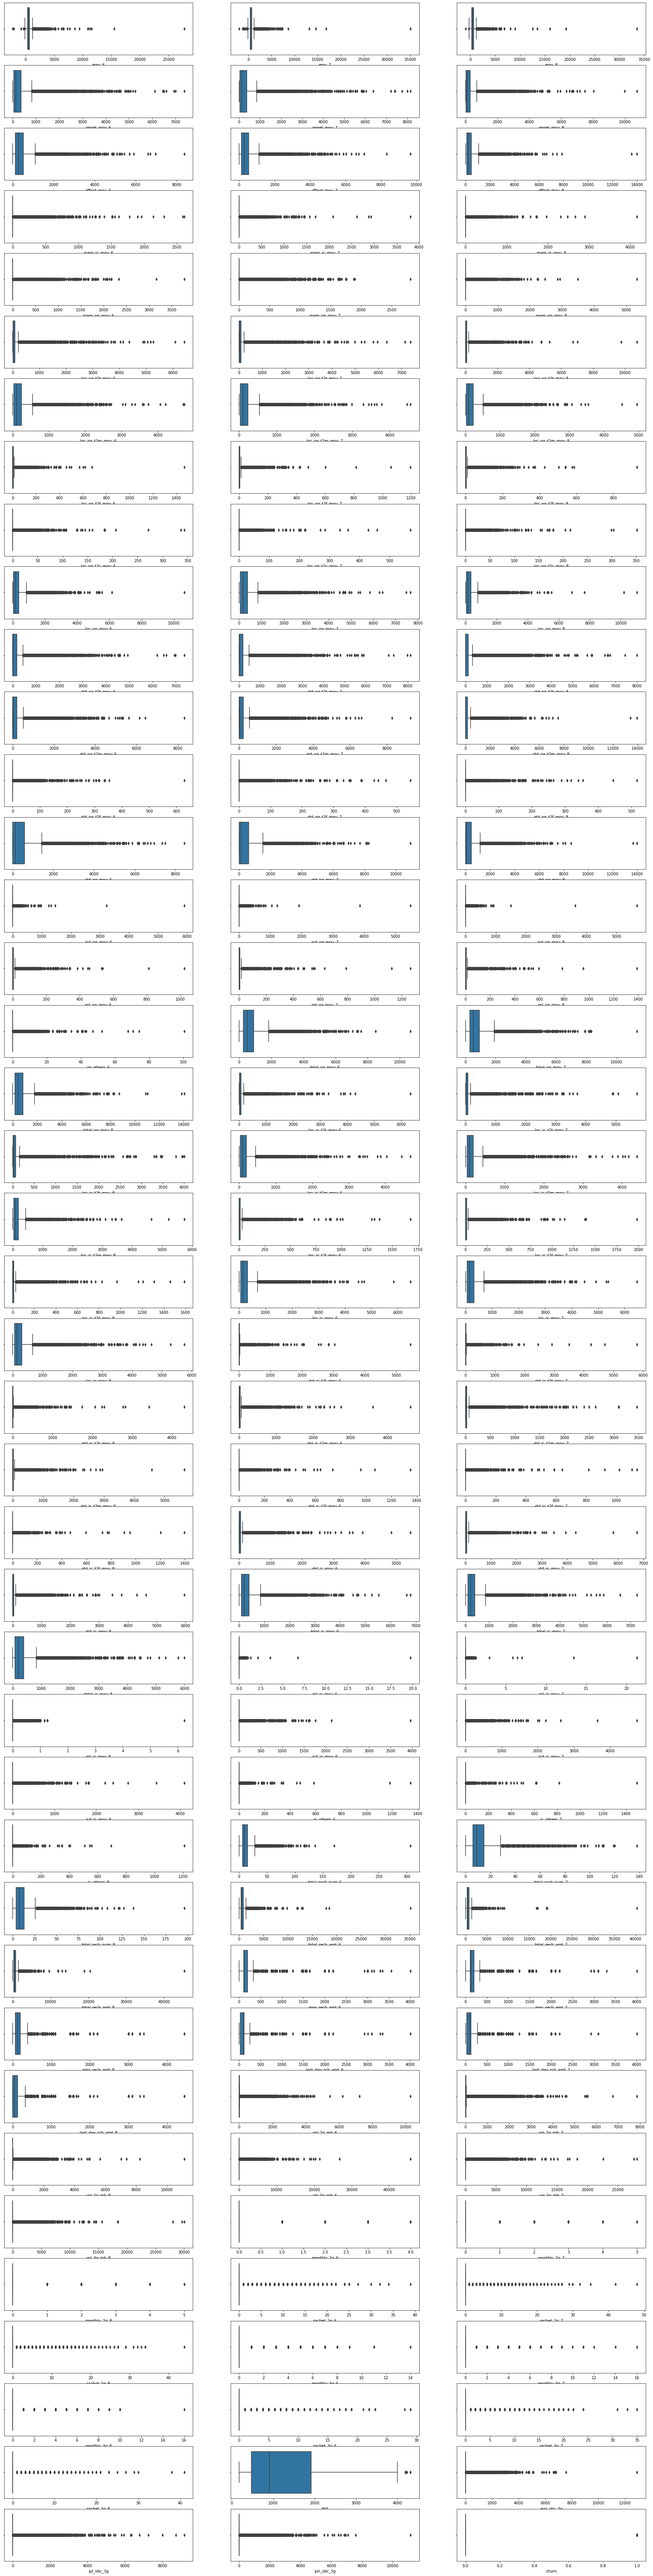

In [78]:
list_cont=df4.columns[1:]
plt.figure(figsize=(30,150))
for i,col in enumerate (list_cont):
    plt.subplot(50,3,i+1)
    sns.boxplot(df4[col])

In [79]:
#Removing all roaming and ISD columns
roaming = ['roam_ic_mou_7','roam_ic_mou_6','roam_ic_mou_8','roam_og_mou_7','roam_og_mou_6','roam_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8']
#Removing Roaming columns as all most of the values are 0
df4 = df4.drop(roaming, axis = 1)

In [80]:
#As seeing lot of outliers Performing capping on all the columns except Mobile_number and Churn column

out_col = df4.columns[1:-1]
for i in out_col:
    upper_lim = df4[i].quantile(.90)
    lower_lim = df4[i].quantile(.10)

    df4.loc[(df4[i] > upper_lim),i] = upper_lim
    df4.loc[(df4[i] < lower_lim),i] = lower_lim

In [81]:
df4.shape

(29979, 115)

In [82]:
# preparing dependent and independent variable

X=df4.drop(['churn','mobile_number'],axis=1)
y=df4['churn']

In [83]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [84]:
#Copying train test split for Random forest and Decision tree 
X_train1=X_train.copy()
X_test1=X_test.copy()
y_train1=y_train.copy()
y_test1=y_test.copy()

In [85]:
print("X train :" ,X_train.shape)
print("y train: ",y_train.shape)
print("X test : ",X_test.shape)
print("y test: " ,y_test.shape)

X train : (20985, 113)
y train:  (20985,)
X test :  (8994, 113)
y test:  (8994,)


In [86]:
# standardizing columns except  mobile_number and churn column

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [87]:
#Checking Churn rate in train data

churn_value=100*(sum(y_train)/len(y_train.index))
print("Churn Rate in train data is " ,round(churn_value,2))

Churn Rate in train data is  8.45


In [88]:
#Copying train test split for Random forest and Decision tree 


In [89]:
#applying SMOTE analysis
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [90]:
X_train.shape

(38422, 113)

In [91]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [92]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38422
Model:                            GLM   Df Residuals:                    38313
Model Family:                Binomial   Df Model:                          108
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13879.
Date:                Mon, 18 May 2020   Deviance:                       27758.
Time:                        18:34:57   Pearson chi2:                 5.17e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7069      0.025    -68.376      0.000      -1.756      -1.658
arpu_6                -0.0543      0.052     -1.040      0.299      -0.157       0.048
arpu_7                 0.3398      0.054      6.277      0.000       0.234       0.446
arpu_8                 0.4992      0.060      8.374      0.000       0.382       0.616
onnet_mou_6            0.1674      0.072      2.330      0.020       0.027       0.308
onnet_mou_7            0.2975      0.091      3.267      0.001       0.119       0.476
onnet_mou_8            0.4169      0.092      4.527      0.000       0.236       0.597
offnet_mou_6           0.1532      0.065      2.346      0.019       0.025       0.281
offnet_mou_7           0.2551      0.078      3.290      0.001       0.103       0.407
offnet_mou_8           0.3774      0.077      4.872      0.000       0.226       0.529
loc_og_t2t_mou_6       0.1435      0.057      2.497      0.013       0.031       0.256
loc_og_t2t_mou_7       0.0974      0.064      1.527      0.127      -0.028       0.222
loc_og_t2t_mou_8      -0.3807      0.068     -5.594      0.000      -0.514      -0.247
loc_og_t2m_mou_6       0.3096      0.090      3.434      0.001       0.133       0.486
loc_og_t2m_mou_7      -0.0798      0.102     -0.782      0.434      -0.280       0.120
loc_og_t2m_mou_8      -0.4147      0.112     -3.703      0.000      -0.634      -0.195
loc_og_t2f_mou_6      -0.0764      0.032     -2.377      0.017      -0.139      -0.013
loc_og_t2f_mou_7       0.0283      0.035      0.814      0.416      -0.040       0.096
loc_og_t2f_mou_8      -0.1316      0.036     -3.647      0.000      -0.202      -0.061
loc_og_t2c_mou_6      -0.0908      0.022     -4.088      0.000      -0.134      -0.047
loc_og_t2c_mou_7       0.0084      0.022      0.375      0.708      -0.035       0.052
loc_og_t2c_mou_8      -0.0264      0.024     -1.114      0.265      -0.073       0.020
loc_og_mou_6          -0.4485      0.118     -3.790      0.000      -0.680      -0.217
loc_og_mou_7          -0.4082      0.134     -3.041      0.002      -0.671      -0.145
loc_og_mou_8           0.8392      0.151      5.554      0.000       0.543       1.135
std_og_t2t_mou_6      -0.1950      0.076     -2.571      0.010      -0.344      -0.046
std_og_t2t_mou_7      -0.0627      0.093     -0.670      0.503      -0.246       0.121
std_og_t2t_mou_8      -0.5346      0.092     -5.830      0.000      -0.714      -0.355
std_og_t2m_mou_6      -0.3171      0.064     -4.956      0.000      -0.443      -0.192
std_og_t2m_mou_7       0.1396      0.078      1.801      0.072      -0.012       0.291
std_og_t2m_mou_8      -0.4535      0.072     -6.320      0.000      -0.594      -0.313
std_og_t2f_mou_6      -0.0044      0.025     -0.172      0.863      -0.054       0.045
std_og_t2f_mou_7       0.0119      0.0

In [93]:
# Using RFE 

rfe=RFE(logreg,30)
rfe=rfe.fit(X_train,y_train)

In [94]:
rfe.support_
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_6', False, 42),
 ('arpu_7', True, 1),
 ('arpu_8', False, 6),
 ('onnet_mou_6', False, 4),
 ('onnet_mou_7', False, 11),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 34),
 ('offnet_mou_7', False, 9),
 ('offnet_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 15),
 ('loc_og_t2t_mou_7', False, 48),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 2),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 55),
 ('loc_og_t2f_mou_7', False, 65),
 ('loc_og_t2f_mou_8', False, 19),
 ('loc_og_t2c_mou_6', False, 41),
 ('loc_og_t2c_mou_7', False, 76),
 ('loc_og_t2c_mou_8', False, 67),
 ('loc_og_mou_6', False, 3),
 ('loc_og_mou_7', False, 10),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 5),
 ('std_og_t2t_mou_7', False, 54),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 14),
 ('std_og_t2m_mou_7', False, 33),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 77),
 ('std_og_t2f_mou_7', False, 73),
 ('st

In [95]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_mou_6', 'std_ic_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6',
       'total_rech_

In [96]:
col = X_train.columns[rfe.support_]

In [97]:
X_train_sm = sm.add_constant(X_train[col])
def GLM_result():
    logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm2.fit()
    print(res.summary())
GLM_result()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38422
Model:                            GLM   Df Residuals:                    38391
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14414.
Date:                Mon, 18 May 2020   Deviance:                       28827.
Time:                        18:36:15   Pearson chi2:                 5.85e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6275      0

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

              Features    VIF
18        loc_ic_mou_8  46.60
17        loc_ic_mou_7  37.95
7         loc_og_mou_8  34.74
10        std_og_mou_8  34.50
11      total_og_mou_8  27.11
15    loc_ic_t2m_mou_8  23.75
6     loc_og_t2m_mou_8  22.48
14    loc_ic_t2m_mou_7  19.88
25      total_ic_mou_8  17.72
8     std_og_t2t_mou_8  16.69
22        std_ic_mou_8  14.18
2          onnet_mou_8  13.92
24      total_ic_mou_7  13.17
9     std_og_t2m_mou_8  11.72
3         offnet_mou_8  11.42
20    std_ic_t2m_mou_8   8.28
13    loc_ic_t2t_mou_8   8.04
4     loc_og_t2t_mou_8   7.60
12    loc_ic_t2t_mou_7   6.14
5     loc_og_t2m_mou_7   4.68
19    std_ic_t2t_mou_8   3.63
23      total_ic_mou_6   2.64
16    loc_ic_t2f_mou_8   1.82
26    total_rech_num_8   1.78
1               arpu_7   1.54
27  last_day_rch_amt_8   1.52
21    std_ic_t2f_mou_8   1.39
0                const   1.35
29         vol_3g_mb_8   1.30
30                 aon   1.24
28         vol_2g_mb_8   1.21


In [99]:
#find all the high valued VIFs
new_VIF_df = vif[vif['VIF']<=15]
drp_col = new_VIF_df['Features']
drp_col = list(drp_col)

In [100]:
# Re-running the model using the selected variables
X_train_sm = X_train_sm[drp_col]
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()

In [101]:
GLM_result()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38422
Model:                            GLM   Df Residuals:                    38401
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15289.
Date:                Mon, 18 May 2020   Deviance:                       30578.
Time:                        18:36:19   Pearson chi2:                 4.52e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
std_ic_mou_8           0.4114      0

In [102]:
X_train_sm=X_train_sm.drop(columns=['std_ic_mou_8'])


NameError: name 'vif_func' is not defined

In [103]:
GLM_result()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38422
Model:                            GLM   Df Residuals:                    38402
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15312.
Date:                Mon, 18 May 2020   Deviance:                       30624.
Time:                        18:38:31   Pearson chi2:                 4.51e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
onnet_mou_8           -0.2489      0

In [104]:
X_train_sm=X_train_sm.drop(columns=['offnet_mou_8'])
GLM_result()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38422
Model:                            GLM   Df Residuals:                    38403
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15312.
Date:                Mon, 18 May 2020   Deviance:                       30624.
Time:                        18:38:31   Pearson chi2:                 4.52e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
onnet_mou_8           -0.2502      0

In [105]:
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38422
Model:                            GLM   Df Residuals:                    38403
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15312.
Date:                Mon, 18 May 2020   Deviance:                       30624.
Time:                        18:38:32   Pearson chi2:                 4.52e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
onnet_mou_8           -0.2502      0.020    -12.584      0.000      -0.289      -0.211
total_ic_mou_7        -0.1110      0.034     -3.267      0.001      -0.178      -0.044
std_og_t2m_mou_8      -0.3136      0.019    -16.373      0.000      -0.351      -0.276
std_ic_t2m_mou_8      -0.1831      0.022     -8.505      0.000      -0.225      -0.141
loc_ic_t2t_mou_8      -0.6992      0.037    -18.918      0.000      -0.772      -0.627
loc_og_t2t_mou_8      -0.2814      0.031     -9.193      0.000      -0.341      -0.221
loc_ic_t2t_mou_7       0.4160      0.032     13.140      0.000       0.354       0.478
loc_og_t2m_mou_7      -0.5411      0.023    -23.053      0.000      -0.587      -0.495
std_ic_t2t_mou_8      -0.1166      0.020     -5.723      0.000      -0.157      -0.077
total_ic_mou_6         0.2594      0.026     10.027      0.000       0.209       0.310
loc_ic_t2f_mou_8      -0.4536      0.026    -17.615      0.000      -0.504      -0.403
total_rech_num_8      -0.7079      0.020    -35.751      0.000      -0.747      -0.669
arpu_7                 0.5916      0.019     31.199      0.000       0.554       0.629
last_day_rch_amt_8    -0.7955      0.019    -42.334      0.000      -0.832      -0.759
std_ic_t2f_mou_8      -0.2748      0.024    -11.622      0.000      -0.321      -0.228
const                 -1.4946      0.022    -67.937      0.000      -1.538      -1.452
vol_3g_mb_8           -0.5493      0.024    -23.323      0.000      -0.595      -0.503
aon                   -0.3046      0.018    -16.746      0.000      -0.340      -0.269
vol_2g_mb_8           -0.4601      0.022    -20.744      0.000      -0.504      -0.417
======================================================================================
"""

In [106]:
# All VIF and P-Values are under required value now 
X_train_sm.shape

(38422, 19)

In [107]:
final_col=X_train_sm.columns

In [108]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred.describe()

count    38422.000000
mean         0.500000
std          0.352581
min          0.000081
25%          0.134778
50%          0.505402
75%          0.870170
max          0.995775
dtype: float64

In [109]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.071197
1,0,0.577139
2,0,0.005403
3,0,0.606743
4,0,0.291742


In [110]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

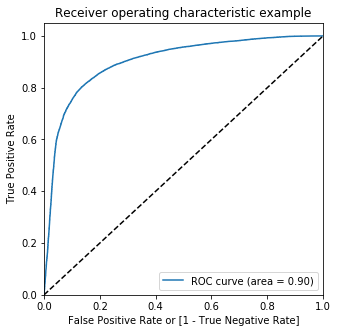

In [112]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [113]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.071197,1,0,0,0,0,0,0,0,0,0
1,0,0.577139,1,1,1,1,1,1,0,0,0,0
2,0,0.005403,1,0,0,0,0,0,0,0,0,0
3,0,0.606743,1,1,1,1,1,1,1,0,0,0
4,0,0.291742,1,1,1,0,0,0,0,0,0,0


In [114]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','prec'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec= cm1[1,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,prec]
print(cutoff_df)

     prob  accuracy     sensi     speci      prec
0.0   0.0  0.500000  1.000000  0.000000  0.500000
0.1   0.1  0.683098  0.972568  0.393629  0.615963
0.2   0.2  0.755062  0.944407  0.565718  0.685003
0.3   0.3  0.797252  0.912550  0.681953  0.741551
0.4   0.4  0.821404  0.876425  0.766384  0.789543
0.5   0.5  0.831815  0.834158  0.829473  0.830268
0.6   0.6  0.832986  0.789079  0.876893  0.865042
0.7   0.7  0.821066  0.729009  0.913123  0.893518
0.8   0.8  0.792150  0.638957  0.945344  0.921201
0.9   0.9  0.643954  0.309614  0.978294  0.934485


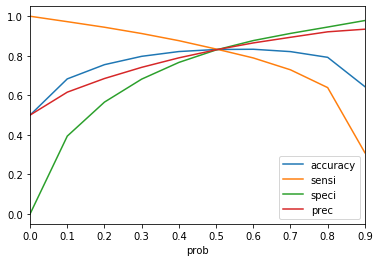

In [115]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci','prec'])
plt.show()

In [116]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.6 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.071197,1,0,0,0,0,0,0,0,0,0,0
1,0,0.577139,1,1,1,1,1,1,0,0,0,0,0
2,0,0.005403,1,0,0,0,0,0,0,0,0,0,0
3,0,0.606743,1,1,1,1,1,1,1,0,0,0,1
4,0,0.291742,1,1,1,0,0,0,0,0,0,0,0


In [117]:
# Let's check the overall accuracy in percentage
print("Accuracy on train data :",round(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted),2))

Accuracy on train data : 0.83


In [118]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion1

array([[16846,  2365],
       [ 4052, 15159]], dtype=int64)

In [119]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [120]:
print("Sensitivity of the train model : ",round(TP / float(TP+FN),2))
print("Positive predictive value / Precision of the train model  :  ",round(TP / float(TP+FP),2))

Sensitivity of the train model :  0.79
Positive predictive value / Precision of the train model  :   0.87


## TEST PREDICTION

In [121]:
X_test[X_test.columns] = scaler.fit_transform(X_test[X_test.columns])

In [122]:
cols=X_train_sm.columns

In [123]:
# Performing the similar dropping of column made to train set after checking P _value and VIF
X_test_sm=X_test.filter(items=cols,axis=1)

In [124]:
X_test_sm = sm.add_constant(X_test_sm)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

76438    0.005300
72869    0.149022
86053    0.000212
29093    0.914203
96385    0.913319
16713    0.227549
78343    0.971937
81467    0.970487
56584    0.000482
9517     0.926632
dtype: float64

In [125]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [126]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [127]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [128]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [129]:
y_pred_final.head()

,churn,0
0,0,0.005300
1,0,0.149022
2,0,0.000212
3,0,0.914203
4,0,0.913319


In [130]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [131]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [132]:
# Let's check the overall accuracy in percentage
print("Accuracy on test data ",round((metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)),2))

Accuracy on test data  0.51


In [133]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[3872, 4307],
       [ 122,  693]], dtype=int64)

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
print("Sensitivity of the test model ",round(TP / float(TP+FN),2))

print("Positive predictive value / Precision of the test model ",round(TP / float(TP+FP) ,2))


Sensitivity of the test model  0.85
Positive predictive value / Precision of the test model  0.14


In [136]:
model_result=pd.DataFrame(columns=['Model Name','Accuracy','Sensitivity'])

In [137]:
newrow={'Model Name':"Logistic Regression",'Accuracy':round((TP+TN) / float(TP+FN+TN+FP),2) ,'Sensitivity':round(TP / float(TP+FN) ,2)}
model_result=model_result.append(newrow,ignore_index=True)
print(model_result)

            Model Name  Accuracy  Sensitivity
0  Logistic Regression      0.51         0.85


### Optimizing Logistic Regression 

In [138]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={'C': [0.001, 0.01,0.02,0.04,0.06,0.07,0.08,0.09, 0.1, 1,2,3,4,5,10, 100], "penalty":["l1","l2"]}  # l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train_sm,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.8314768827366738


In [139]:
logreg2=LogisticRegression(C=0.01,penalty="l2",class_weight='balanced')
logreg2.fit(X_train_sm,y_train)
print("score",logreg2.score(X_test_sm,y_test))

score 0.7219257282632866


In [140]:
y_test_pred = logreg2.predict(X_test_sm)
y_test_pred[:10]

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [141]:
y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [142]:
# Appending y_test_df and y_pred_1
y_pred_final_adj = pd.concat([y_test_df, y_pred_1],axis=1)

In [143]:
# Renaming the column 
y_pred_final_adj = y_pred_final_adj.rename(columns={ 0 : 'Churn_CV'})

In [144]:
y_pred_final_adj.head()

,churn,Churn_CV
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1


In [145]:
# Let's check the overall accuracy in percentage
print("Accuracy on test data ",round((metrics.accuracy_score(y_pred_final_adj.churn, y_pred_final_adj.Churn_CV)),2))

Accuracy on test data  0.72


In [146]:
confusion3 = metrics.confusion_matrix(y_pred_final_adj.churn, y_pred_final_adj.Churn_CV )
confusion3

array([[6029, 2150],
       [ 351,  464]], dtype=int64)

In [147]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [148]:
newrow={'Model Name':"Logistic Regression_Tuning",'Accuracy':round((TP+TN) / float(TP+FN+TN+FP),2) ,'Sensitivity':round(TP / float(TP+FN) ,2)}
model_result=model_result.append(newrow,ignore_index=True)
print(model_result)

                   Model Name  Accuracy  Sensitivity
0         Logistic Regression      0.51         0.85
1  Logistic Regression_Tuning      0.72         0.57


### Applying PCA to reduce features

In [149]:
from sklearn.decomposition import PCA

pca = PCA(random_state =1)
pca.fit_transform(X)

array([[-4.46541308e+01,  1.10996001e+02,  1.09015367e+03, ...,
        -1.89672964e-14,  2.71009628e-14,  6.55112629e-14],
       [-2.12617593e+02, -1.29817976e+03,  4.67357435e+01, ...,
        -8.66121671e-14,  6.15125023e-14, -7.28476346e-14],
       [-3.08262247e+02,  1.18221967e+03, -8.64827976e+02, ...,
         1.07860522e-13,  5.95033139e-14, -1.97088493e-14],
       ...,
       [-2.19023206e+02,  2.17877771e+03,  7.37895256e+02, ...,
         1.50616913e-15,  1.38159869e-15,  2.36858914e-15],
       [-2.71830416e+02, -8.43119008e+02,  7.02157175e+02, ...,
        -2.34837012e-15, -7.12124483e-16,  3.47373736e-16],
       [-9.22733107e+02, -1.44688892e+03,  5.31077768e+02, ...,
        -1.59091420e-15,  4.69128989e-16, -4.06575213e-16]])

In [150]:
pca.components_

array([[ 6.92173558e-02,  9.31130127e-02,  8.85420242e-02, ...,
        -3.38028468e-02, -3.58843058e-02, -3.11277634e-02],
       [ 8.19386088e-02,  1.02747553e-01,  1.43230074e-01, ...,
         3.44374407e-03, -1.26662114e-03, -2.07905138e-03],
       [ 1.05945650e-01,  1.37568140e-01,  1.82806778e-01, ...,
         8.65988043e-02,  8.80380881e-02,  7.15898566e-02],
       ...,
       [ 0.00000000e+00,  9.54905506e-20, -5.20486628e-20, ...,
         1.09191007e-19,  5.57273051e-20, -1.47621112e-19],
       [ 0.00000000e+00, -8.94845584e-21,  9.63943992e-21, ...,
         2.11621446e-20,  2.62135131e-20, -8.21506742e-20],
       [ 0.00000000e+00,  2.55319456e-21,  3.86082895e-21, ...,
        -4.94999095e-20, -7.42825983e-21,  6.31520033e-20]])

<BarContainer object of 113 artists>

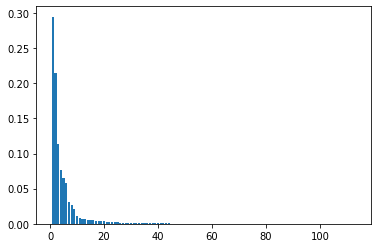

In [151]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [152]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

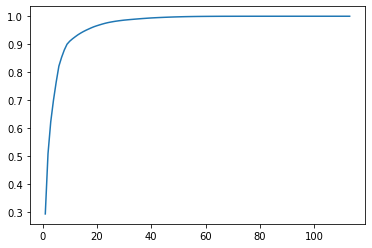

In [153]:
#Making Scree plot
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [154]:
X_test.shape

(8994, 113)

In [155]:
num=22

In [156]:
pc2 = PCA(n_components=num, random_state=1)
x_train_pca = pc2.fit_transform(X_train)
x_test_pca = pc2.transform(X_test)

In [157]:
print(x_train_pca.shape)
column_names = ['PC_'+str(i) for i in range(0,num)]

(38422, 22)


In [158]:
x_train_pca = pd.DataFrame(x_train_pca, columns = column_names)

In [159]:
x_train_pca.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21
0,-0.969363,3.326313,3.710763,-3.188610,-5.268140,1.592303,-0.086542,-0.130231,-0.090223,-0.698243,-0.723465,-0.538192,-0.036129,-0.286263,-1.053429,-0.113814,-0.995808,0.830747,1.072183,-1.346043,0.698002,0.963639
1,-0.597215,-5.204388,3.439032,0.111799,0.952256,1.216132,1.283725,-0.979084,-0.903836,1.245907,-0.321534,-1.026219,0.459074,0.214339,-1.085531,0.779465,0.639838,-0.416179,1.182511,-0.140608,-0.348437,-0.179922
2,6.855292,-4.192529,2.225771,1.698752,2.247379,3.164314,2.475946,0.346425,3.829068,1.282177,1.137658,-1.857661,2.069683,0.875970,-3.477222,0.052669,2.448582,-1.420142,3.269080,-1.306555,-0.067180,0.163768
3,1.921342,3.667986,1.228059,-1.563862,-3.124964,1.381390,-1.654118,-0.620515,-2.357242,-0.226240,-0.332952,0.718102,0.209921,0.235857,-0.304784,-0.405010,-1.312639,1.745038,0.987552,-1.248157,-0.617729,-0.397549
4,-2.885356,2.543674,0.648378,1.001569,-3.633342,3.036087,-1.976138,2.526103,-0.326352,0.470612,0.030475,0.086774,2.572645,-0.750061,2.068157,1.197974,-0.781186,0.091723,0.286089,-0.483532,-0.421797,-0.320607


### Model Builind after PCA

## 1.Logistic Regression

In [160]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={'C': [0.001, 0.01,0.02,0.04,0.06,0.07,0.08,0.09, 0.1, 1,2,3,4,5,10, 100], "penalty":["l1","l2"]}  # l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(x_train_pca,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.02, 0.04, 0.06, 0.07, 0.08, 0.09,
                               0.1, 1, 2, 3, 4, 5, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [161]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.08, 'penalty': 'l2'}
accuracy : 0.833611164078024


In [162]:
logreg3=LogisticRegression(C=0.08,penalty="l2",class_weight='balanced')
res=logreg3.fit(x_train_pca,y_train)
print("score",logreg3.score(x_test_pca,y_test))

score 0.8315543695797198


In [163]:
#logreg3.fit(x_test_pca,y_test)

y_test_pred = logreg3.predict(x_test_pca)
y_test_pred[:10]

y_pred_2 = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting ID to index
y_test_df['mobile_number'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_2.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


# Appending y_test_df and y_pred_2
y_pred_final_adj_pca = pd.concat([y_test_df, y_pred_2],axis=1)

# Renaming the column 
y_pred_final_adj_pca= y_pred_final_adj_pca.rename(columns={ 0 : 'Churn_Prob'})

y_pred_final_adj_pca['final_predicted'] = y_pred_final_adj_pca.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy in percentage
print("Accuracy on test data ",round((metrics.accuracy_score(y_pred_final.churn, y_pred_final_adj_pca.final_predicted)),2))

confusion3 = metrics.confusion_matrix(y_pred_final_adj_pca.churn, y_pred_final_adj_pca.final_predicted )
confusion3


TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

Accuracy on test data  0.83


In [164]:
newrow={'Model Name':"Logistic Regression PCA_CV",'Accuracy':round((TP+TN) / float(TP+FN+TN+FP),2) ,'Sensitivity':round(TP / float(TP+FN) ,2)}
model_result=model_result.append(newrow,ignore_index=True)
print(model_result)

                   Model Name  Accuracy  Sensitivity
0         Logistic Regression      0.51         0.85
1  Logistic Regression_Tuning      0.72         0.57
2  Logistic Regression PCA_CV      0.83         0.79


## 2.Random Forest

In [165]:
pc3 = PCA(n_components=num, random_state=1)
x_train_pca1 = pc3.fit_transform(X_train1)
x_test_pca1 = pc3.transform(X_test1)

In [166]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(class_weight={0:1,1:9})
random.fit(x_train_pca1, y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 9},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [167]:
x_test_pca1 = pd.DataFrame(x_test_pca1, columns = column_names)

In [168]:
y_test_pred = random.predict(x_test_pca1)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [169]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print(classification_report(y_test1,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      8179
           1       0.63      0.15      0.24       815

    accuracy                           0.91      8994
   macro avg       0.78      0.57      0.60      8994
weighted avg       0.89      0.91      0.89      8994



In [170]:
# Printing confusion matrix
print(confusion_matrix(y_test1,y_test_pred))

[[8107   72]
 [ 693  122]]


In [171]:
print(accuracy_score(y_test1,y_test_pred))

0.9149432955303536


In [172]:
## Hyper parameter Tuning

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# instantiate the model
rf = RandomForestClassifier()


# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10,14],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [10, 15,20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [173]:
#grid_search.fit(x_train_pca1, y_train1)

In [174]:
# printing the optimal accuracy score and hyperparameters
#print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [175]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=20,
                             n_estimators=100,
                             class_weight={0:1,1:9})

In [176]:
rfc.fit(x_train_pca1, y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 9},
                       criterion='gini', max_depth=10, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [177]:
y_final_pred = rfc.predict(x_test_pca1)

In [178]:
print(classification_report(y_test1,y_final_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      8179
           1       0.35      0.71      0.47       815

    accuracy                           0.85      8994
   macro avg       0.66      0.79      0.69      8994
weighted avg       0.91      0.85      0.87      8994



In [179]:
cm1 = confusion_matrix(y_test1,y_final_pred)

In [180]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','prec'])
total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
prec= cm1[1,1]/(cm1[0,1]+cm1[1,1])
cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,prec]
print(cutoff_df)

     prob  accuracy     sensi     speci      prec
0.9   0.9  0.852902  0.706748  0.867465  0.346988


In [181]:
newrow={'Model Name':"Random Forest",'Accuracy':accuracy ,'Sensitivity':sensi}
model_result=model_result.append(newrow,ignore_index=True)
print(model_result)

                   Model Name  Accuracy  Sensitivity
0         Logistic Regression  0.510000     0.850000
1  Logistic Regression_Tuning  0.720000     0.570000
2  Logistic Regression PCA_CV  0.830000     0.790000
3               Random Forest  0.852902     0.706748


## 3. Decision Tree

In [182]:
from sklearn.tree import DecisionTreeClassifier

dec = DecisionTreeClassifier(max_depth=15,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=15,
                             class_weight={0:1,1:9})

In [183]:
dec.fit(x_train_pca1, y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 9},
                       criterion='gini', max_depth=15, max_features=15,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [184]:
cm1 = confusion_matrix(y_test1,y_final_pred)

In [185]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','prec'])
total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
prec= cm1[1,1]/(cm1[0,1]+cm1[1,1])
cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,prec]
print(cutoff_df)

     prob  accuracy     sensi     speci      prec
0.9   0.9  0.852902  0.706748  0.867465  0.346988


In [186]:
newrow={'Model Name':"Decision Tree",'Accuracy':accuracy ,'Sensitivity':sensi}
model_result=model_result.append(newrow,ignore_index=True)
print(model_result)

                   Model Name  Accuracy  Sensitivity
0         Logistic Regression  0.510000     0.850000
1  Logistic Regression_Tuning  0.720000     0.570000
2  Logistic Regression PCA_CV  0.830000     0.790000
3               Random Forest  0.852902     0.706748
4               Decision Tree  0.852902     0.706748


In [187]:
The Columns which describe the churn values in Logistic regression are :
#print(final_col)

SyntaxError: invalid syntax (<ipython-input-187-58258a3d6d74>, line 1)